In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob

In [8]:
os.getcwd()

'E:\\Users\\DELL\\Desktop\\Loyalist\\AI\\Assignment\\Datasets'

In [13]:
os.chdir("C:\\Users\\admin\\Desktop\\Loyalist\\AI\\Assignment\\Datasets")

In [14]:
os.getcwd()

'C:\\Users\\admin\\Desktop\\Loyalist\\AI\\Assignment\\Datasets'

In [15]:
extension = 'csv'

In [21]:
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] #PPT
print(all_filenames)

['Amazon.csv', 'Apple.csv', 'Facebook.csv', 'Google.csv', 'Netflix.csv']


In [2]:
facebook=pd.read_csv('Facebook.csv')
amazon=pd.read_csv('Amazon.csv')
apple=pd.read_csv('Apple.csv')
netflix=pd.read_csv('Netflix.csv')
google=pd.read_csv('Google.csv')

In [3]:
files=[facebook,amazon,apple,google,netflix]
prefix=['facebook_','amazon_','apple_','netflix_','google_']
names=[facebook,amazon,apple,netflix,google]

In [4]:
facebook['company']='Facebook'
apple['company']='Apple'
amazon['company']='Amazon'
netflix['company']='Netflix'
google['company']='Google'

In [5]:
apple.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
company      0
dtype: int64

In [6]:
#print(apple.isna().sum())
apple=apple.dropna(how='any')
apple.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
company      0
dtype: int64

In [7]:
for count in range(len(files)):
  names[count]=pd.DataFrame(files[count]).add_prefix(prefix[count])

In [8]:
for name in names:
  name[name.columns[0]]=name[name.columns[0]].apply(lambda x : pd.to_datetime(x))
  name.rename(columns={name.columns[0]:'Date'},inplace=True)
  name=name.replace(np.nan,0)
  name[name.columns[6]]=name[name.columns[6]].apply(lambda x: np.log(x) if x!=0 else 0)

In [9]:
facebook=names[0]
amazon=names[1]
apple=names[2]
netflix=names[3]
google=names[4]

In [10]:
final=pd.merge(facebook,amazon,how='outer' ,on='Date') 
final1=pd.merge(final,apple,how='outer' ,on='Date') 
final2=pd.merge(final1,netflix,how='outer' ,on='Date') 
final3=pd.merge(final2,google,how='outer' ,on='Date') 
final3['Date']=final3['Date'].apply(lambda x:x.year)
final3.replace(np.nan,0,inplace=True)
final3.shape

(10019, 36)

In [11]:
final4=final3.groupby('Date').median()
final4['Date']=final4.index

In [12]:
final4.shape

(41, 31)

In [14]:
final3.columns

Index(['Date', 'facebook_Open', 'facebook_High', 'facebook_Low',
       'facebook_Close', 'facebook_Adj Close', 'facebook_Volume',
       'facebook_company', 'amazon_Open', 'amazon_High', 'amazon_Low',
       'amazon_Close', 'amazon_Adj Close', 'amazon_Volume', 'amazon_company',
       'apple_Open', 'apple_High', 'apple_Low', 'apple_Close',
       'apple_Adj Close', 'apple_Volume', 'apple_company', 'netflix_Open',
       'netflix_High', 'netflix_Low', 'netflix_Close', 'netflix_Adj Close',
       'netflix_Volume', 'netflix_company', 'google_Open', 'google_High',
       'google_Low', 'google_Close', 'google_Adj Close', 'google_Volume',
       'google_company'],
      dtype='object')

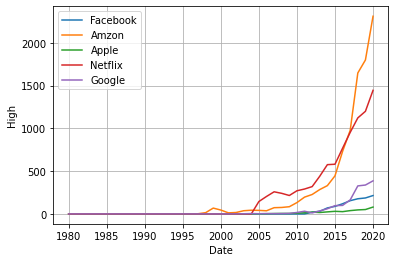

In [15]:
plt.plot(final4['Date'], final4['facebook_High'], label='Facebook')
plt.plot(final4['Date'], final4['amazon_High'], label='Amzon')
plt.plot(final4['Date'], final4['apple_High'], label='Apple')
plt.plot(final4['Date'], final4['netflix_High'], label='Netflix')              
plt.plot(final4['Date'], final4['google_High'], label='Google')
plt.xlabel('Date')
plt.ylabel('High')        
plt.grid(True)
plt.legend()